In [1]:
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
df = pd.read_csv('mll.csv')

In [4]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [6]:
df.isnull().sum()

ID             0
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 124, dtype: int64

In [7]:
pd.set_option("display.max.rows", None)

In [8]:
df.isnull().sum()


ID                  0
AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im    

In [9]:
df2=df
df3=df
df4=df
df5=df

In [10]:
# df2 for  the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 
# can be used for prediction

df2=df2.fillna(df2.median())

In [11]:
df2.isnull().sum()

ID               0
AGE              0
SEX              0
INF_ANAM         0
STENOK_AN        0
FK_STENOK        0
IBS_POST         0
IBS_NASL         0
GB               0
SIM_GIPERT       0
DLIT_AG          0
ZSN_A            0
nr_11            0
nr_01            0
nr_02            0
nr_03            0
nr_04            0
nr_07            0
nr_08            0
np_01            0
np_04            0
np_05            0
np_07            0
np_08            0
np_09            0
np_10            0
endocr_01        0
endocr_02        0
endocr_03        0
zab_leg_01       0
zab_leg_02       0
zab_leg_03       0
zab_leg_04       0
zab_leg_06       0
S_AD_KBRIG       0
D_AD_KBRIG       0
S_AD_ORIT        0
D_AD_ORIT        0
O_L_POST         0
K_SH_POST        0
MP_TP_POST       0
SVT_POST         0
GT_POST          0
FIB_G_POST       0
ant_im           0
lat_im           0
inf_im           0
post_im          0
IM_PG_P          0
ritm_ecg_p_01    0
ritm_ecg_p_02    0
ritm_ecg_p_04    0
ritm_ecg_p_0

In [12]:
df['LET_IS'].groupby(df['LET_IS']).count()

LET_IS
0    1429
1     110
2      18
3      54
4      23
5      12
6      27
7      27
Name: LET_IS, dtype: int64

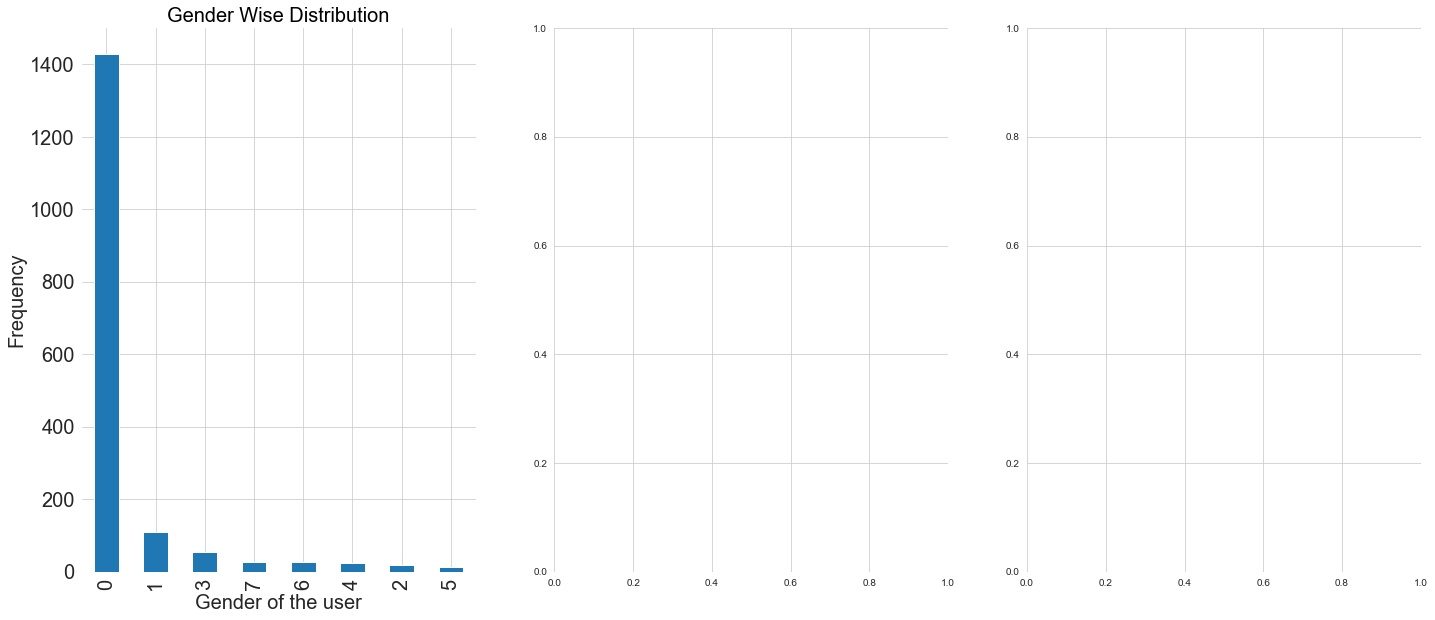

In [13]:
import seaborn as sns

sns.set_style('whitegrid')
fig,ax= plt.subplots(1,3,sharex=False, sharey=False,figsize=(24,10))
df.LET_IS.value_counts().plot.bar(ax=ax[0],fontsize=20) 
ax[0].set_title("Gender Wise Distribution", fontsize=20,color='black')
ax[0].set_xlabel("Gender of the user", fontsize=20)
ax[0].set_ylabel("Frequency", fontsize=20)
sns.despine(bottom=True, left=True)


In [14]:
# input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105
df2.drop(['R_AB_1_n','R_AB_2_n','R_AB_3_n','NA_R_1_n','NA_R_2_n','NA_R_3_n','NOT_NA_1_n','NOT_NA_2_n','NOT_NA_3_n'],axis=1, inplace=True)

In [15]:
#dropping columns whith values missing more tha 350
df2.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD','NA_KB','NOT_NA_KB','LID_KB'],axis=1, inplace=True)

In [16]:
df2.shape

(1700, 108)

In [17]:
df2.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.38,0.22,8.0,16.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,10.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.0,10.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,10.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
X= df2.iloc[:,:96]
X.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.38,0.22,8.0,16.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,10.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.0,10.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,10.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [19]:
y=df2.iloc[:,107:]
y.head()

,LET_IS
0,0
1,0
2,0
3,0
4,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.45982714, 0.02420825, 0.00498235, 0.01458464, 0.02448385,
       0.01573579, 0.00997371, 0.        , 0.        , 0.        ,
       0.02116132, 0.01275201, 0.00666532, 0.01074848, 0.        ,
       0.        , 0.00561937, 0.00335207, 0.        , 0.01375399,
       0.        , 0.01187272, 0.        , 0.01453692, 0.00167417,
       0.01780818, 0.0039448 , 0.        , 0.00112266, 0.00322525,
       0.01170703, 0.00875701, 0.        , 0.05770504, 0.05992235,
       0.0107727 , 0.06473725, 0.02237968, 0.        , 0.        ,
       0.00102916, 0.00461197, 0.00560616, 0.        , 0.        ,
       0.01607765, 0.0353303 , 0.01806701, 0.00169598, 0.0163871 ,
       0.03013865, 0.        , 0.        , 0.01704794, 0.0070705 ,
       0.00554749, 0.01232258, 0.00352716, 0.        , 0.00458716,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02142323, 0.01167425, 0.01191116, 0.        , 0.00279722,
       0.        , 0.0080067 , 0.00815614, 0.        , 0.00871

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ID               0.459827
K_SH_POST        0.064737
D_AD_ORIT        0.059922
S_AD_ORIT        0.057705
NITR_S           0.035530
ritm_ecg_p_01    0.035330
ritm_ecg_p_07    0.030139
ANT_CA_S_n       0.028789
L_BLOOD          0.027831
STENOK_AN        0.024484
AGE              0.024208
MP_TP_POST       0.022380
n_p_ecg_p_06     0.021423
ZSN_A            0.021161
ASP_S_n          0.020574
ritm_ecg_p_02    0.018067
endocr_01        0.017808
n_r_ecg_p_02     0.017048
ALT_BLOOD        0.016909
ritm_ecg_p_06    0.016387
IM_PG_P          0.016078
FK_STENOK        0.015736
GEPAR_S_n        0.014833
fibr_ter_07      0.014656
INF_ANAM         0.014585
np_09            0.014537
B_BLOK_S_n       0.014219
np_04            0.013754
nr_11            0.012752
TIKL_S_n         0.012470
n_r_ecg_p_05     0.012323
n_p_ecg_p_08     0.011911
np_07            0.011873
zab_leg_03       0.011707
n_p_ecg_p_07     0.011674
ROE              0.011101
K_BLOOD          0.010796
O_L_POST         0.010773
nr_02       

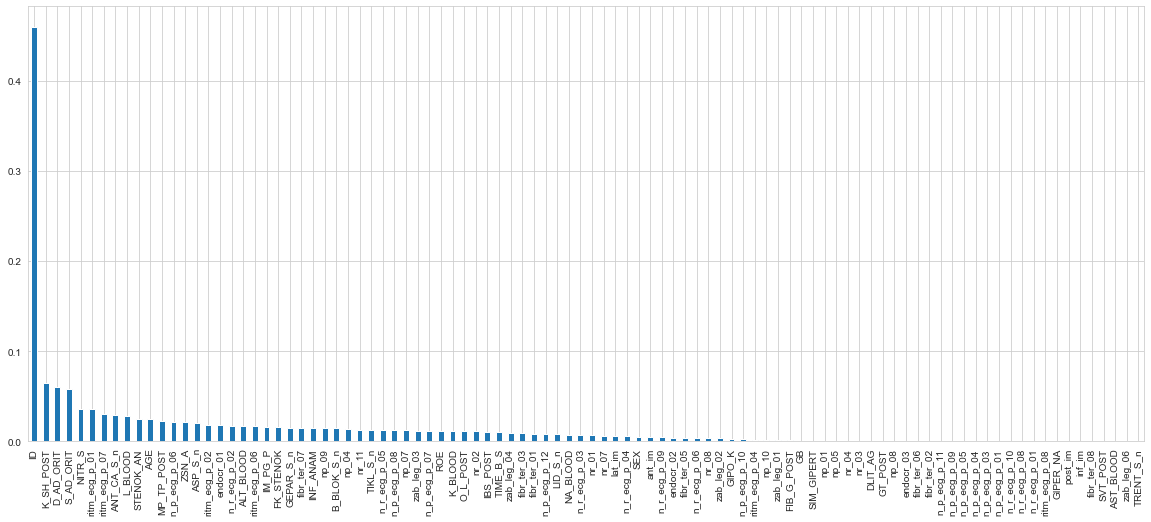

In [23]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
#Now we Will select the  top 20 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ID', 'AGE', 'STENOK_AN', 'SIM_GIPERT', 'ZSN_A', 'np_07', 'S_AD_ORIT',
       'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'ritm_ecg_p_07', 'n_p_ecg_p_01', 'fibr_ter_06', 'GIPER_NA', 'L_BLOOD',
       'ROE', 'NITR_S', 'ASP_S_n'],
      dtype='object')

In [26]:
cols=['ID', 'AGE', 'STENOK_AN', 'SIM_GIPERT', 'ZSN_A', 'np_07', 'S_AD_ORIT',
       'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'ritm_ecg_p_01', 'ritm_ecg_p_02',
       'ritm_ecg_p_07', 'n_p_ecg_p_01', 'fibr_ter_06', 'GIPER_NA', 'L_BLOOD',
       'ROE', 'NITR_S', 'ASP_S_n']
X1= X[cols]
print(X1.shape)

(1700, 20)


In [27]:
y.shape


(1700, 1)

In [28]:
# Without feature selection passing the complete DATA

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [31]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [32]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [33]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,91.691176,90.294118
1,RandomForestClassifier,100.000000,90.588235
2,DecisionTreeClassifier,100.000000,89.411765
3,GaussianNB,44.191176,42.352941
4,RidgeClassifier,87.205882,87.941176
5,SVC,89.264706,89.705882


In [34]:
# With Feature Selection

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)

In [36]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [37]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [38]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [39]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,91.764706,90.294118
1,RandomForestClassifier,100.000000,91.764706
2,DecisionTreeClassifier,100.000000,90.588235
3,GaussianNB,73.750000,72.058824
4,RidgeClassifier,86.102941,87.647059
5,SVC,89.264706,89.705882


In [40]:
# 2. the end of the first day (24 hours after admission to the hospital): all input columns (2-112) 
# except 94, 95, 101, 102, 104, 105 can be used for prediction;

df3=df3.fillna(df3.median())
df3.isnull().sum()

ID               0
AGE              0
SEX              0
INF_ANAM         0
STENOK_AN        0
FK_STENOK        0
IBS_POST         0
IBS_NASL         0
GB               0
SIM_GIPERT       0
DLIT_AG          0
ZSN_A            0
nr_11            0
nr_01            0
nr_02            0
nr_03            0
nr_04            0
nr_07            0
nr_08            0
np_01            0
np_04            0
np_05            0
np_07            0
np_08            0
np_09            0
np_10            0
endocr_01        0
endocr_02        0
endocr_03        0
zab_leg_01       0
zab_leg_02       0
zab_leg_03       0
zab_leg_04       0
zab_leg_06       0
S_AD_KBRIG       0
D_AD_KBRIG       0
S_AD_ORIT        0
D_AD_ORIT        0
O_L_POST         0
K_SH_POST        0
MP_TP_POST       0
SVT_POST         0
GT_POST          0
FIB_G_POST       0
ant_im           0
lat_im           0
inf_im           0
post_im          0
IM_PG_P          0
ritm_ecg_p_01    0
ritm_ecg_p_02    0
ritm_ecg_p_04    0
ritm_ecg_p_0

In [41]:
# all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;

df3.drop(['R_AB_2_n','R_AB_3_n','NA_R_2_n','NA_R_3_n','NOT_NA_2_n','NOT_NA_3_n'],axis=1, inplace=True)

In [42]:
#dropping columns whith values missing more tha 350
df3.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD','NA_KB','NOT_NA_KB','LID_KB'],axis=1, inplace=True)

In [43]:
df3.shape

(1700, 111)

In [44]:
X= df3.iloc[:,:99]
X.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,NITR_S,NA_R_1_n,NOT_NA_1_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.38,0.22,8.0,16.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,10.0,3.0,3.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [45]:
y=df3.iloc[:,110]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape


(1190, 99)

In [48]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.45170739, 0.02871931, 0.        , 0.        , 0.02395678,
       0.00763971, 0.01269   , 0.        , 0.        , 0.01022967,
       0.01481055, 0.0147381 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00640268, 0.        , 0.01312434,
       0.        , 0.00560133, 0.        , 0.00896507, 0.00433524,
       0.01870188, 0.        , 0.        , 0.00973015, 0.02111399,
       0.        , 0.        , 0.        , 0.0620536 , 0.05859308,
       0.01754995, 0.05958179, 0.        , 0.        , 0.01106659,
       0.        , 0.01839243, 0.01394339, 0.00178182, 0.        ,
       0.00974565, 0.01170473, 0.0115964 , 0.0157353 , 0.        ,
       0.0204516 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00747806, 0.        , 0.        , 0.        ,
       0.01262678, 0.01617094, 0.        , 0.        , 0.00333944,
       0.        , 0.        , 0.        , 0.00585878, 0.        ,
       0.        , 0.02226313, 0.        , 0.01640305, 0.     

In [49]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ID               0.451707
S_AD_ORIT        0.062054
K_SH_POST        0.059582
D_AD_ORIT        0.058593
AGE              0.028719
NITR_S           0.028289
STENOK_AN        0.023957
n_p_ecg_p_12     0.022263
zab_leg_02       0.021114
ritm_ecg_p_07    0.020452
K_BLOOD          0.019041
endocr_01        0.018702
ant_im           0.018392
O_L_POST         0.017550
ALT_BLOOD        0.017527
TIME_B_S         0.017500
fibr_ter_02      0.016403
n_p_ecg_p_01     0.016171
ritm_ecg_p_04    0.015735
ASP_S_n          0.015626
ZSN_A            0.014811
nr_11            0.014738
lat_im           0.013943
NA_R_1_n         0.013642
np_04            0.013124
IBS_POST         0.012690
n_r_ecg_p_10     0.012627
ritm_ecg_p_01    0.011705
ritm_ecg_p_02    0.011596
GT_POST          0.011067
fibr_ter_06      0.010999
DLIT_AG          0.010230
IM_PG_P          0.009746
zab_leg_01       0.009730
L_BLOOD          0.009399
np_09            0.008965
fibr_ter_07      0.008446
FK_STENOK        0.007640
n_r_ecg_p_05

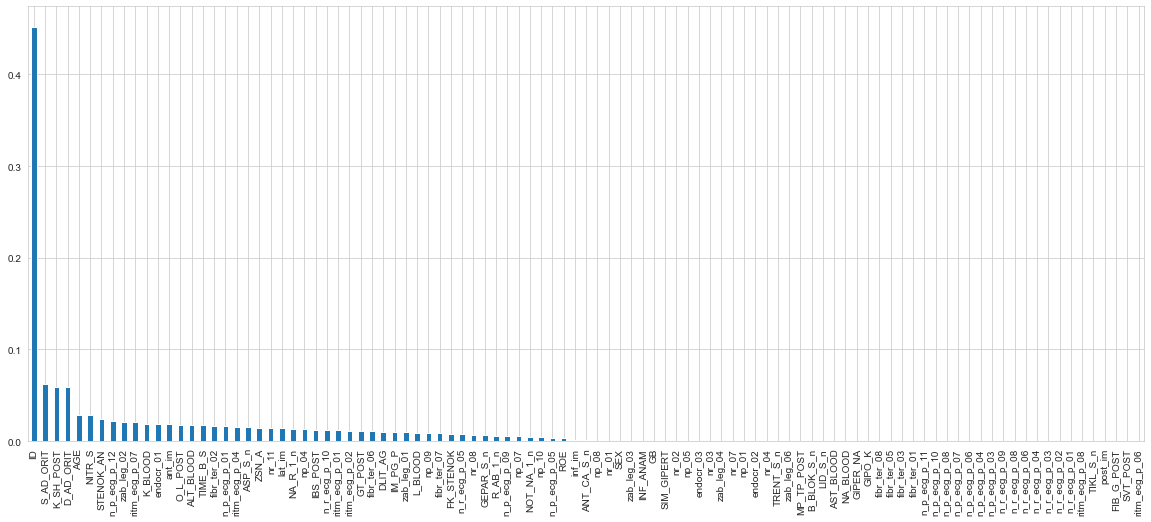

In [50]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [51]:

from sklearn.feature_selection import SelectKBest
#No we Will select the  top 20 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ID', 'AGE', 'INF_ANAM', 'ZSN_A', 'nr_11', 'np_09', 'endocr_01',
       'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'SVT_POST', 'IM_PG_P',
       'ritm_ecg_p_01', 'n_r_ecg_p_02', 'L_BLOOD', 'TIME_B_S', 'NITR_S',
       'NA_R_1_n', 'ANT_CA_S_n', 'ASP_S_n'],
      dtype='object')

In [ ]:
# Without Feature Selection

In [52]:
cols=['ID', 'AGE', 'INF_ANAM', 'ZSN_A', 'nr_11', 'np_09', 'endocr_01',
       'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'SVT_POST', 'IM_PG_P',
       'ritm_ecg_p_01', 'n_r_ecg_p_02', 'L_BLOOD', 'TIME_B_S', 'NITR_S',
       'NA_R_1_n', 'ANT_CA_S_n', 'ASP_S_n']
X1= X[cols]
print(X1.shape)

(1700, 20)


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [55]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [56]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [57]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,92.100840,89.803922
1,RandomForestClassifier,100.000000,88.823529
2,DecisionTreeClassifier,100.000000,90.000000
3,GaussianNB,43.025210,40.196078
4,RidgeClassifier,87.899160,87.058824
5,SVC,89.159664,89.607843


In [58]:
#  With Feature Selection

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=0)

In [60]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [61]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [62]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [63]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,92.268908,89.803922
1,RandomForestClassifier,100.000000,90.784314
2,DecisionTreeClassifier,100.000000,90.392157
3,GaussianNB,76.974790,73.725490
4,RidgeClassifier,86.554622,87.058824
5,SVC,89.159664,89.607843


In [64]:
#3. the end of the second day (48 hours after admission to the hospital) all input columns (2-112) 
# except 95, 102, 105 can be used for prediction;


df4=df4.fillna(df4.median())
df4.isnull().sum()

ID               0
AGE              0
SEX              0
INF_ANAM         0
STENOK_AN        0
FK_STENOK        0
IBS_POST         0
IBS_NASL         0
GB               0
SIM_GIPERT       0
DLIT_AG          0
ZSN_A            0
nr_11            0
nr_01            0
nr_02            0
nr_03            0
nr_04            0
nr_07            0
nr_08            0
np_01            0
np_04            0
np_05            0
np_07            0
np_08            0
np_09            0
np_10            0
endocr_01        0
endocr_02        0
endocr_03        0
zab_leg_01       0
zab_leg_02       0
zab_leg_03       0
zab_leg_04       0
zab_leg_06       0
S_AD_KBRIG       0
D_AD_KBRIG       0
S_AD_ORIT        0
D_AD_ORIT        0
O_L_POST         0
K_SH_POST        0
MP_TP_POST       0
SVT_POST         0
GT_POST          0
FIB_G_POST       0
ant_im           0
lat_im           0
inf_im           0
post_im          0
IM_PG_P          0
ritm_ecg_p_01    0
ritm_ecg_p_02    0
ritm_ecg_p_04    0
ritm_ecg_p_0

In [65]:
# all input columns (2-112) except 95, 102, 105 can be used for prediction;

df4.drop(['R_AB_3_n','NA_R_3_n','NOT_NA_3_n'],axis=1, inplace=True)

In [66]:
df4.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD','NA_KB','NOT_NA_KB','LID_KB'],axis=1, inplace=True)


In [67]:
df4.shape

(1700, 114)

In [68]:
X= df4.iloc[:,:102]
X.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,NITR_S,NA_R_1_n,NA_R_2_n,NOT_NA_1_n,NOT_NA_2_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.38,0.22,8.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,10.0,3.0,3.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [69]:
y=df4.iloc[:,113]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape


(1190, 102)

In [71]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([4.52379200e-01, 3.70636418e-02, 6.13612400e-03, 2.68515845e-02,
       4.24972376e-03, 1.96194281e-02, 0.00000000e+00, 8.40236862e-03,
       0.00000000e+00, 1.45752073e-02, 2.76951312e-03, 0.00000000e+00,
       2.73986219e-02, 1.20870501e-02, 0.00000000e+00, 2.50571592e-03,
       1.42357501e-03, 2.87823677e-03, 2.17808069e-03, 4.63886523e-03,
       1.02815488e-02, 0.00000000e+00, 1.05324959e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.35659857e-03, 1.72908869e-02, 0.00000000e+00, 0.00000000e+00,
       4.21803089e-03, 7.97082816e-02, 6.93216340e-02, 9.79555771e-03,
       4.51124257e-02, 1.71485011e-02, 0.00000000e+00, 0.00000000e+00,
       3.29793455e-03, 2.13975293e-02, 1.33435467e-02, 1.54761505e-02,
       0.00000000e+00, 0.00000000e+00, 2.02447494e-02, 4.49015161e-03,
       2.78141589e-02, 2.26241050e-02, 1.71894283e-02, 9.12676231e-03,
       5.20770769e-03, 0.00000000e+00, 5.41736956e-03, 7.98263198e-03,
      

In [72]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ID               0.452379
S_AD_ORIT        0.079708
D_AD_ORIT        0.069322
K_SH_POST        0.045112
AGE              0.037064
NITR_S           0.036549
ritm_ecg_p_04    0.027814
nr_01            0.027399
INF_ANAM         0.026852
GEPAR_S_n        0.025132
ritm_ecg_p_06    0.022624
ant_im           0.021398
ritm_ecg_p_01    0.020245
FK_STENOK        0.019619
NA_R_1_n         0.019041
fibr_ter_07      0.018835
ROE              0.018089
zab_leg_02       0.017291
ritm_ecg_p_07    0.017189
MP_TP_POST       0.017149
TIME_B_S         0.016507
inf_im           0.015476
DLIT_AG          0.014575
lat_im           0.013344
ASP_S_n          0.012412
n_p_ecg_p_05     0.012328
nr_02            0.012087
n_r_ecg_p_05     0.011525
n_r_ecg_p_09     0.011121
np_08            0.010532
n_p_ecg_p_12     0.010367
np_05            0.010282
ANT_CA_S_n       0.010139
n_p_ecg_p_06     0.009934
fibr_ter_03      0.009871
O_L_POST         0.009796
LID_S_n          0.009681
K_BLOOD          0.009365
ritm_ecg_p_0

In [86]:

from sklearn.feature_selection import SelectKBest
#No we Will select the  top 20 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ID', 'AGE', 'SEX', 'STENOK_AN', 'ZSN_A', 'zab_leg_01', 'S_AD_ORIT',
       'D_AD_ORIT', 'K_SH_POST', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_07',
       'n_p_ecg_p_09', 'L_BLOOD', 'TIME_B_S', 'NITR_S', 'NA_R_1_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n'],
      dtype='object')

In [87]:
cols=['ID', 'AGE', 'INF_ANAM', 'DLIT_AG', 'ZSN_A', 'np_09', 'endocr_02',
       'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'ant_im', 'inf_im',
       'ritm_ecg_p_01', 'fibr_ter_02', 'NITR_S', 'NA_R_1_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n']
X1= X[cols]
print(X1.shape)

(1700, 20)


In [88]:
# Without Feature Selection

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [83]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [84]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [85]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,91.617647,90.294118
1,RandomForestClassifier,100.000000,90.588235
2,DecisionTreeClassifier,100.000000,88.823529
3,GaussianNB,43.897059,41.470588
4,RidgeClassifier,87.352941,87.941176
5,SVC,89.264706,89.705882


In [ ]:
#With Feature Selection

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)

In [91]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [92]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [93]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [94]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,92.058824,90.882353
1,RandomForestClassifier,100.000000,92.058824
2,DecisionTreeClassifier,100.000000,89.705882
3,GaussianNB,77.573529,76.176471
4,RidgeClassifier,86.102941,87.647059
5,SVC,89.264706,89.705882


In [102]:
# 4. the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction
df5.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD','NA_KB','NOT_NA_KB','LID_KB'],axis=1, inplace=True)


In [103]:
df5=df5.fillna(df5.median())

In [104]:
df5.shape

(1700, 117)

In [105]:
X= df5.iloc[:,:105]
X.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.38,0.22,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,10.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,8.0,10.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [107]:
y=df5.iloc[:,116]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LET_IS, dtype: int64

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape


(1190, 105)

In [109]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.45226052, 0.02424353, 0.01126745, 0.02412487, 0.00967199,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01002389, 0.02182514, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00596407, 0.        , 0.        ,
       0.        , 0.00121716, 0.01243619, 0.        , 0.00448488,
       0.00268369, 0.00938093, 0.        , 0.01455288, 0.        ,
       0.        , 0.00140582, 0.00083462, 0.06233349, 0.04865502,
       0.01150657, 0.0435808 , 0.        , 0.        , 0.        ,
       0.0150648 , 0.02926682, 0.        , 0.00718817, 0.        ,
       0.01969515, 0.0177468 , 0.01181302, 0.0086197 , 0.        ,
       0.01498399, 0.01559706, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00173071, 0.00124732,
       0.00163927, 0.00350567, 0.00883394, 0.        , 0.        ,
       0.        , 0.00692065, 0.        , 0.00116041, 0.        ,
       0.00896947, 0.0188026 , 0.01034088, 0.00117566, 0.     

In [110]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ID               0.452261
S_AD_ORIT        0.062333
D_AD_ORIT        0.048655
K_SH_POST        0.043581
ant_im           0.029267
AGE              0.024244
INF_ANAM         0.024125
TIME_B_S         0.023140
nr_11            0.021825
NA_R_1_n         0.020102
ALT_BLOOD        0.020045
IM_PG_P          0.019695
n_p_ecg_p_12     0.018803
GEPAR_S_n        0.018459
ritm_ecg_p_01    0.017747
ANT_CA_S_n       0.017635
NITR_S           0.016771
ritm_ecg_p_08    0.015597
FIB_G_POST       0.015065
ritm_ecg_p_07    0.014984
NA_R_3_n         0.014814
zab_leg_01       0.014553
fibr_ter_08      0.013747
np_08            0.012436
ritm_ecg_p_02    0.011813
ROE              0.011568
O_L_POST         0.011507
SEX              0.011267
L_BLOOD          0.011238
ASP_S_n          0.011012
fibr_ter_01      0.010341
ZSN_A            0.010024
STENOK_AN        0.009672
B_BLOK_S_n       0.009541
endocr_02        0.009381
n_p_ecg_p_11     0.008969
n_p_ecg_p_03     0.008834
ritm_ecg_p_04    0.008620
TRENT_S_n   

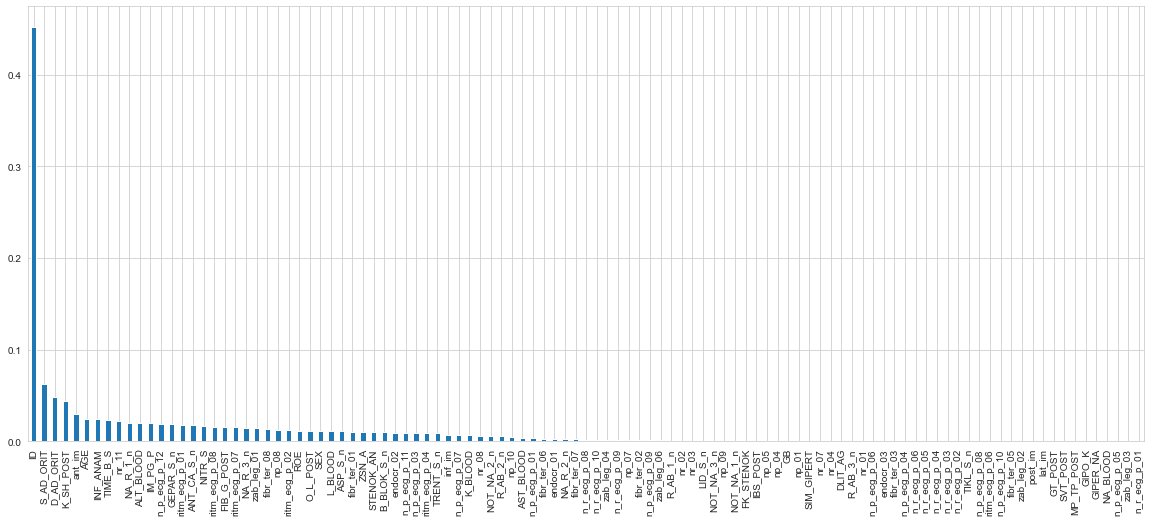

In [111]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [112]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 20 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['ID', 'AGE', 'FK_STENOK', 'endocr_01', 'zab_leg_02', 'S_AD_ORIT',
       'D_AD_ORIT', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'ant_im', 'IM_PG_P',
       'ritm_ecg_p_01', 'n_p_ecg_p_09', 'K_BLOOD', 'ROE', 'TIME_B_S', 'NITR_S',
       'NA_R_1_n', 'GEPAR_S_n'],
      dtype='object')

In [113]:
cols=['ID', 'AGE', 'INF_ANAM', 'DLIT_AG', 'ZSN_A', 'np_09', 'endocr_02',
       'S_AD_ORIT', 'D_AD_ORIT', 'K_SH_POST', 'ant_im', 'inf_im',
       'ritm_ecg_p_01', 'fibr_ter_02', 'NITR_S', 'NA_R_1_n', 'B_BLOK_S_n',
       'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n']
X1= X[cols]
print(X1.shape)

(1700, 20)


In [114]:
#Without Feature Selection

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [116]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [117]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [118]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [119]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,91.617647,90.294118
1,RandomForestClassifier,100.000000,90.294118
2,DecisionTreeClassifier,100.000000,88.823529
3,GaussianNB,43.750000,40.588235
4,RidgeClassifier,87.426471,87.941176
5,SVC,89.264706,89.705882


In [120]:
#With Feature Selection

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)

In [122]:
def train_test(clf):

    train_predictions =  (clf.fit(X_train, y_train)).predict(X_train)
    test_predictions = (clf.fit(X_train, y_train)).predict(X_test)
    train_f1_score   =  accuracy_score(y_train, train_predictions)*100
    test_f1_score    = fbeta_score(y_test, test_predictions, beta = 0.5, average='micro' )*100
    name_of_model= clf.__class__.__name__
    
    return train_f1_score, test_f1_score, name_of_model

In [123]:
clf_A = KNeighborsClassifier(n_neighbors = 8)
a_train_f1, a_test_f1, a_model = train_test(clf_A)

clf_B = RandomForestClassifier(random_state = 100)
b_train_f1, b_test_f1, b_model = train_test(clf_B)

clf_C = DecisionTreeClassifier(random_state = 100)
c_train_f1, c_test_f1, c_model = train_test(clf_C)

from sklearn.naive_bayes import GaussianNB
clf_D = GaussianNB()
clf_D.fit(X_train, y_train)
d_train_f1, d_test_f1, d_model = train_test(clf_D)

from sklearn.linear_model import RidgeClassifier
clf_E = RidgeClassifier().fit(X_train, y_train)
e_train_f1, e_test_f1, e_model = train_test(clf_E)

from sklearn import svm
clf_F = svm.SVC()
clf_F.fit(X_train, y_train)
f_train_f1, f_test_f1, f_model = train_test(clf_F)

In [124]:
models = {'Model': ['KNeighborsClassifier', b_model, c_model,d_model,e_model,f_model], 
          'train F1 score ':[a_train_f1, b_train_f1, c_train_f1,d_train_f1,e_train_f1,f_train_f1], 
          'test F1 score': [a_test_f1 , b_test_f1, c_test_f1,d_test_f1,e_test_f1,f_test_f1] }
          
comparison = pd.DataFrame(models)

In [125]:
comparison

,Model,train F1 score,test F1 score
0,KNeighborsClassifier,92.058824,90.882353
1,RandomForestClassifier,100.000000,92.058824
2,DecisionTreeClassifier,100.000000,89.705882
3,GaussianNB,77.573529,76.176471
4,RidgeClassifier,86.102941,87.647059
5,SVC,89.264706,89.705882
